In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Load data

In [2]:
# comedy link list
file = 'raw_comedy_02.pkl'
data_directory = os.path.join('..','data','raw_data/{}'.format(file))
df_list = pd.read_pickle(data_directory)
df_list.head()

,name,raw_title,summary,link
0,Louis C.K.,SINCERELY LOUIS CK (2020),Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...
1,Jim Norton,JIM NORTON: AMERICAN DEGENERATE (2013) – FULL ...,"For his second EPIX comedy special, Jim Norton...",https://scrapsfromtheloft.com/2020/05/02/jim-n...
2,Jim Norton,JIM NORTON: MONSTER RAIN (2007) – FULL TRANSCRIPT,"His special ""Monster Rain,"" Jim Norton perform...",https://scrapsfromtheloft.com/2020/05/02/jim-n...
3,Daniel Sloss,DANIEL SLOSS: X (2019) – FULL TRANSCRIPT,Taking the stage before a sold-out audience at...,https://scrapsfromtheloft.com/2020/05/01/danie...
4,Maria Bamford,MARIA BAMFORD: WEAKNESS IS THE BRAND (2020) – ...,"In this standup special ""Weakness Is the Brand...",https://scrapsfromtheloft.com/2020/05/01/maria...


In [3]:
# transcript data
file = 'raw_data_transcript_01.pkl'
data_directory = os.path.join('..','data','raw_data/{}'.format(file))
df_tran = pd.read_pickle(data_directory)
df_tran.head()

,transcript,link
0,Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...
1,This year I wanted the opening of my new speci...,https://scrapsfromtheloft.com/2020/05/02/jim-n...
2,"Thank you! Aw, thank you very much. Thank you,...",https://scrapsfromtheloft.com/2020/05/02/jim-n...
3,A man offered us a billion dollars. – Bolt the...,https://scrapsfromtheloft.com/2020/05/01/danie...
4,[microphone droans]\n[music playing]\n[crowd c...,https://scrapsfromtheloft.com/2020/05/01/maria...


## Merge data on `link`

In [4]:
data = df_list.merge(df_tran,left_on='link',right_on='link')
data.head()

,name,raw_title,summary,link,transcript
0,Louis C.K.,SINCERELY LOUIS CK (2020),Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...,Great comedy is finally back. Louis C.K. is no...
1,Jim Norton,JIM NORTON: AMERICAN DEGENERATE (2013) – FULL ...,"For his second EPIX comedy special, Jim Norton...",https://scrapsfromtheloft.com/2020/05/02/jim-n...,This year I wanted the opening of my new speci...
2,Jim Norton,JIM NORTON: MONSTER RAIN (2007) – FULL TRANSCRIPT,"His special ""Monster Rain,"" Jim Norton perform...",https://scrapsfromtheloft.com/2020/05/02/jim-n...,"Thank you! Aw, thank you very much. Thank you,..."
3,Daniel Sloss,DANIEL SLOSS: X (2019) – FULL TRANSCRIPT,Taking the stage before a sold-out audience at...,https://scrapsfromtheloft.com/2020/05/01/danie...,A man offered us a billion dollars. – Bolt the...
4,Maria Bamford,MARIA BAMFORD: WEAKNESS IS THE BRAND (2020) – ...,"In this standup special ""Weakness Is the Brand...",https://scrapsfromtheloft.com/2020/05/01/maria...,[microphone droans]\n[music playing]\n[crowd c...


## Display Null Data

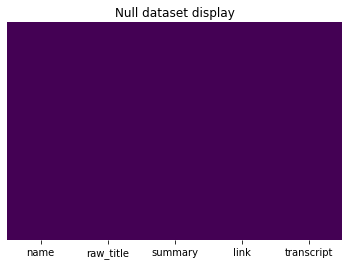

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Check for errors

In [6]:
error_filter = data.transcript == 'error'
data[error_filter]

,name,raw_title,summary,link,transcript
35,Mark Normandthe Tonight Show Starring Jimmy Fa...,Mark Normand Stand-Up – The Tonight Show Starr...,Mark Normand is back on The Tonight Show with ...,https://scrapsfromtheloft.com/2019/09/21/mark-...,error
165,Chris Tucker,CHRIS TUCKER: LIVE (2015) – Full Transcript,"In this Netflix special, Chris Tucker returns ...",https://scrapsfromtheloft.com/2018/01/14/chris...,error
167,Kevin Hart,KEVIN HART: LET ME EXPLAIN (2013) – Full Trans...,Filmed at a sold-out performance at Madison Sq...,https://scrapsfromtheloft.com/2018/01/14/kevin...,error
198,Aziz Ansari,AZIZ ANSARI: BURIED ALIVE (2013) – Full Transc...,Aziz Ansari focuses his unique viewpoint on pe...,https://scrapsfromtheloft.com/2017/12/07/aziz-...,error
281,Jim Gaffigan,JIM GAFFIGAN: CINCO (2017) – Full Transcript,Full transcript of Jim Gaffigan's fifth Netfli...,https://scrapsfromtheloft.com/2017/06/12/jim-g...,error
283,Louis C.K.,LOUIS C.K.: HILARIOUS (2010) – Full Transcript,In this unique and dynamic live concert experi...,https://scrapsfromtheloft.com/2017/06/01/louis...,error


In [7]:
#remove error
data = data[~error_filter]

In [8]:
data[error_filter]

/home/salas/miniconda3/envs/text_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,name,raw_title,summary,link,transcript


## Change col order

In [9]:
# change col order
data = data[['name','raw_title','summary','transcript','link']]
data.head()

,name,raw_title,summary,transcript,link
0,Louis C.K.,SINCERELY LOUIS CK (2020),Great comedy is finally back. Louis C.K. is no...,Great comedy is finally back. Louis C.K. is no...,https://scrapsfromtheloft.com/2020/05/02/since...
1,Jim Norton,JIM NORTON: AMERICAN DEGENERATE (2013) – FULL ...,"For his second EPIX comedy special, Jim Norton...",This year I wanted the opening of my new speci...,https://scrapsfromtheloft.com/2020/05/02/jim-n...
2,Jim Norton,JIM NORTON: MONSTER RAIN (2007) – FULL TRANSCRIPT,"His special ""Monster Rain,"" Jim Norton perform...","Thank you! Aw, thank you very much. Thank you,...",https://scrapsfromtheloft.com/2020/05/02/jim-n...
3,Daniel Sloss,DANIEL SLOSS: X (2019) – FULL TRANSCRIPT,Taking the stage before a sold-out audience at...,A man offered us a billion dollars. – Bolt the...,https://scrapsfromtheloft.com/2020/05/01/danie...
4,Maria Bamford,MARIA BAMFORD: WEAKNESS IS THE BRAND (2020) – ...,"In this standup special ""Weakness Is the Brand...",[microphone droans]\n[music playing]\n[crowd c...,https://scrapsfromtheloft.com/2020/05/01/maria...


## Save

In [10]:
data_directory_saves = os.path.join( '..','data','raw_data/')
data.to_pickle(data_directory_saves+ 'raw_comedy_03.pkl')